In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('figure', figsize=(12,9))
mpl.rc('font', size=20.)

mpl.rc('font', family='serif')
mpl.rc('text', usetex=True)
mpl.rc('axes', color_cycle=['k','b','g','r','yellow'])

import pyGadget

In [2]:
sim0 = pyGadget.sim.Simulation('stampede/vanilla')
sim1 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-3')
sim2 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-2')
sim3 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-1')

halo0 = pyGadget.halo.Halo(sim0)
halo1 = pyGadget.halo.Halo(sim1)
halo2 = pyGadget.halo.Halo(sim2)
halo3 = pyGadget.halo.Halo(sim3)

name = ['J = 0', 'J = J$_0$', 'J = 10 J$_0$', 'J = 100 J$_0$', 'J = 1000 J$_0$']

In [3]:
t0 = pd.read_csv(sim0.plotpath+sim0.name+'/snaptimes.csv', names=[sim0.name, 'time'])
t1 = pd.read_csv(sim1.plotpath+sim1.name+'/snaptimes.csv', names=[sim1.name, 'time'])
t2 = pd.read_csv(sim2.plotpath+sim2.name+'/snaptimes.csv', names=[sim2.name, 'time'])
t3 = pd.read_csv(sim3.plotpath+sim3.name+'/snaptimes.csv', names=[sim3.name, 'time'])

In [4]:
for tseries, halo in [(t0, halo0), (t1, halo1), (t2, halo2), (t3, halo3)]:
    tseries[halo.sim.name+'-mass'] = 0
    tseries['z'] = 1/tseries.time - 1
    for i in tseries.index:
        halo.load(int(tseries.ix[i][halo.sim.name]), 'total_gas')
        tseries.at[i,halo.sim.name+'-mass'] = halo.data[-1]
    print tseries.tail()

      stampede/vanilla      time  stampede/vanilla-mass          z
1754              1754  0.038405                  27010  25.038294
1755              1755  0.038405                  27010  25.038292
1756              1756  0.038405                  27010  25.038289
1757              1757  0.038405                  27010  25.038287
1758              1900  0.038405                  27011  25.037964

[5 rows x 4 columns]
      stampede/XR_sfr_1e-3     time  stampede/XR_sfr_1e-3-mass          z
1764                  1848  0.03735                      21768  25.774049
1765                  1849  0.03735                      21768  25.774047
1766                  1850  0.03735                      21768  25.774045
1767                  1851  0.03735                      21768  25.774042
1768                  1852  0.03735                      21769  25.774040

[5 rows x 4 columns]
      stampede/XR_sfr_1e-2      time  stampede/XR_sfr_1e-2-mass          z
1718                  1726  0.03613

In [5]:
times = pd.merge(t0,t1, on='time', how='outer')
times = pd.merge(times,t2, on='time', how='outer')
times = pd.merge(times,t3, on='time', how='outer')
times['z'] = 1/times.time - 1
times.sort_index(by='time', inplace=True)

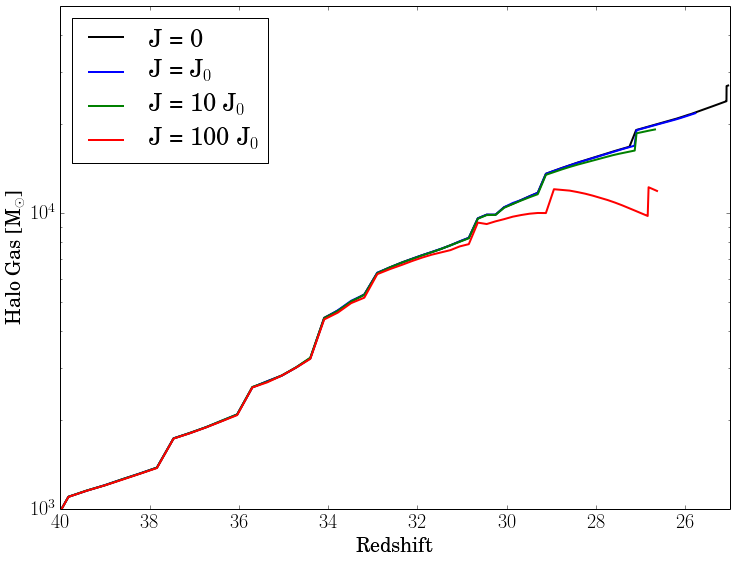

In [12]:
#times[sim0.name+'-mass'].plot()
for i,(tseries,sim) in enumerate([(t0,sim0), (t1,sim1), (t2,sim2), (t3,sim3)]):
    plt.plot(tseries.z, tseries[sim.name+'-mass'], lw=2, label=name[i])
plt.xlim(40,25)
plt.ylim(1e3,5e4)
plt.semilogy()
plt.legend(loc=2)
plt.xlabel('Redshift')
plt.ylabel('Halo Gas [M$_{\odot}$]')
plt.savefig('figures/halo/enclosed_gas_z.png', bbox_inches='tight')

# Enclosed Halo Gas Mass

# Halo Surface Density